In [1]:
import sympy as sp

In [5]:
D = 2
x = sp.symbols(f'x1:{D+1}')
    # polynomial = (1 / D) * sum(8 * x_i**4 - 8 * x_i**2 + 1 for x_i in x) + (sum(x) / D) ** 3
    # 构造矩阵 xx^T
xxT = sp.Matrix(x) * sp.Matrix(x).T

# 构造全 1 的矩阵 J，乘以 1/2
J = sp.Matrix([[1/2] * D] * D)

# 计算目标函数，即 Frobenius 范数的平方
objective_matrix = (xxT - J).applyfunc(lambda x: x**2)
objective = sp.Add(*objective_matrix)  # 将矩阵元素展开并求和


In [7]:
objective

(x1**2 - 0.5)**2 + (x2**2 - 0.5)**2 + 2*(x1*x2 - 0.5)**2

In [8]:
objective_matrix

Matrix([
[(x1**2 - 0.5)**2, (x1*x2 - 0.5)**2],
[(x1*x2 - 0.5)**2, (x2**2 - 0.5)**2]])

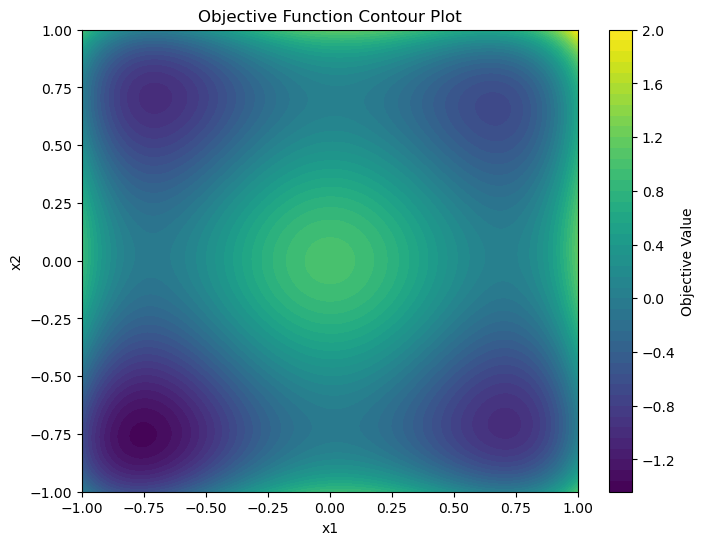

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# 将 sympy 表达式转换为 numpy 可用的函数
objective = (1 / D) * sum(8 * x_i**4 - 8 * x_i**2 + 1 for x_i in x) + (sum(x) / D) ** 3
objective_func = sp.lambdify((x[0], x[1]), objective, 'numpy')

# 设置 x1 和 x2 的值域在 [-1, 1]
x1_vals = np.linspace(-1, 1, 100)
x2_vals = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = objective_func(X1, X2)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.colorbar(label="Objective Value")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Objective Function Contour Plot")
plt.show()

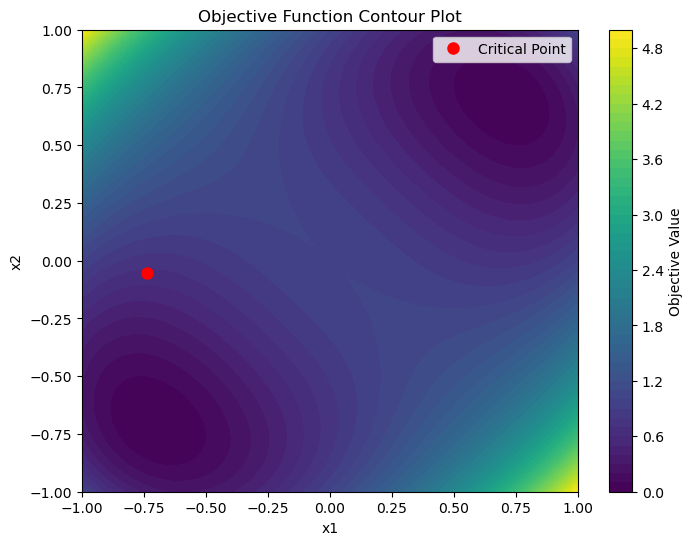

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 设定维数 D = 2
D = 2

# 创建符号变量 x1, x2
x = sp.symbols(f'x1:{D+1}')

# 构造矩阵 xx^T
xxT = sp.Matrix(x) * sp.Matrix(x).T

# 构造全 1/2 的矩阵 J
J = sp.Matrix([[1/2] * D] * D)

# 计算 Frobenius 范数的平方
objective_matrix = (xxT - J).applyfunc(lambda x: x**2)
objective = sp.Add(*objective_matrix)  # 将矩阵元素展开并求和

# 将 sympy 表达式转换为 numpy 可用的函数
objective_func = sp.lambdify((x[0], x[1]), objective, 'numpy')

# 设置 x1 和 x2 的值域在 [-1, 1]
x1_vals = np.linspace(-1, 1, 100)
x2_vals = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = objective_func(X1, X2)

# 指定要标记的点
critical_point = (-0.7381609,-0.05356079)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.colorbar(label="Objective Value")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Objective Function Contour Plot")

# 在图上标出指定的点
plt.plot(critical_point[0], critical_point[1], 'ro', markersize=8, label="Critical Point")
plt.legend()

plt.show()
